<a href="https://colab.research.google.com/github/rizkinahayyuni/PCVK_Genap_2022/blob/main/Modul5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM 

---
**1. Gamma Correction**


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


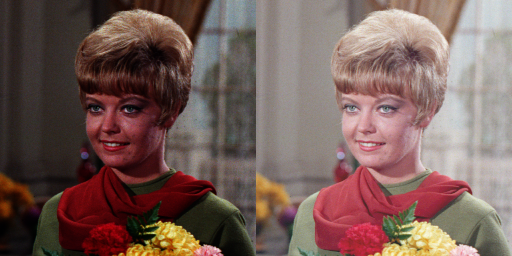

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

def gammaCorrection(src, gamma):
    invGamma = 1 / gamma
 
    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)
 
    return cv.LUT(src, table)
 
 
img = cv.imread('/content/drive/MyDrive/DATA/female.tiff')
gama_image = gammaCorrection(img, gamma)

final_frame = cv.hconcat((img, gama_image))
cv2_imshow(final_frame)

**2. Image Depth**

Image Depth Simulation pada citra
--------------------------------
Masukkan nilai Depth : 2


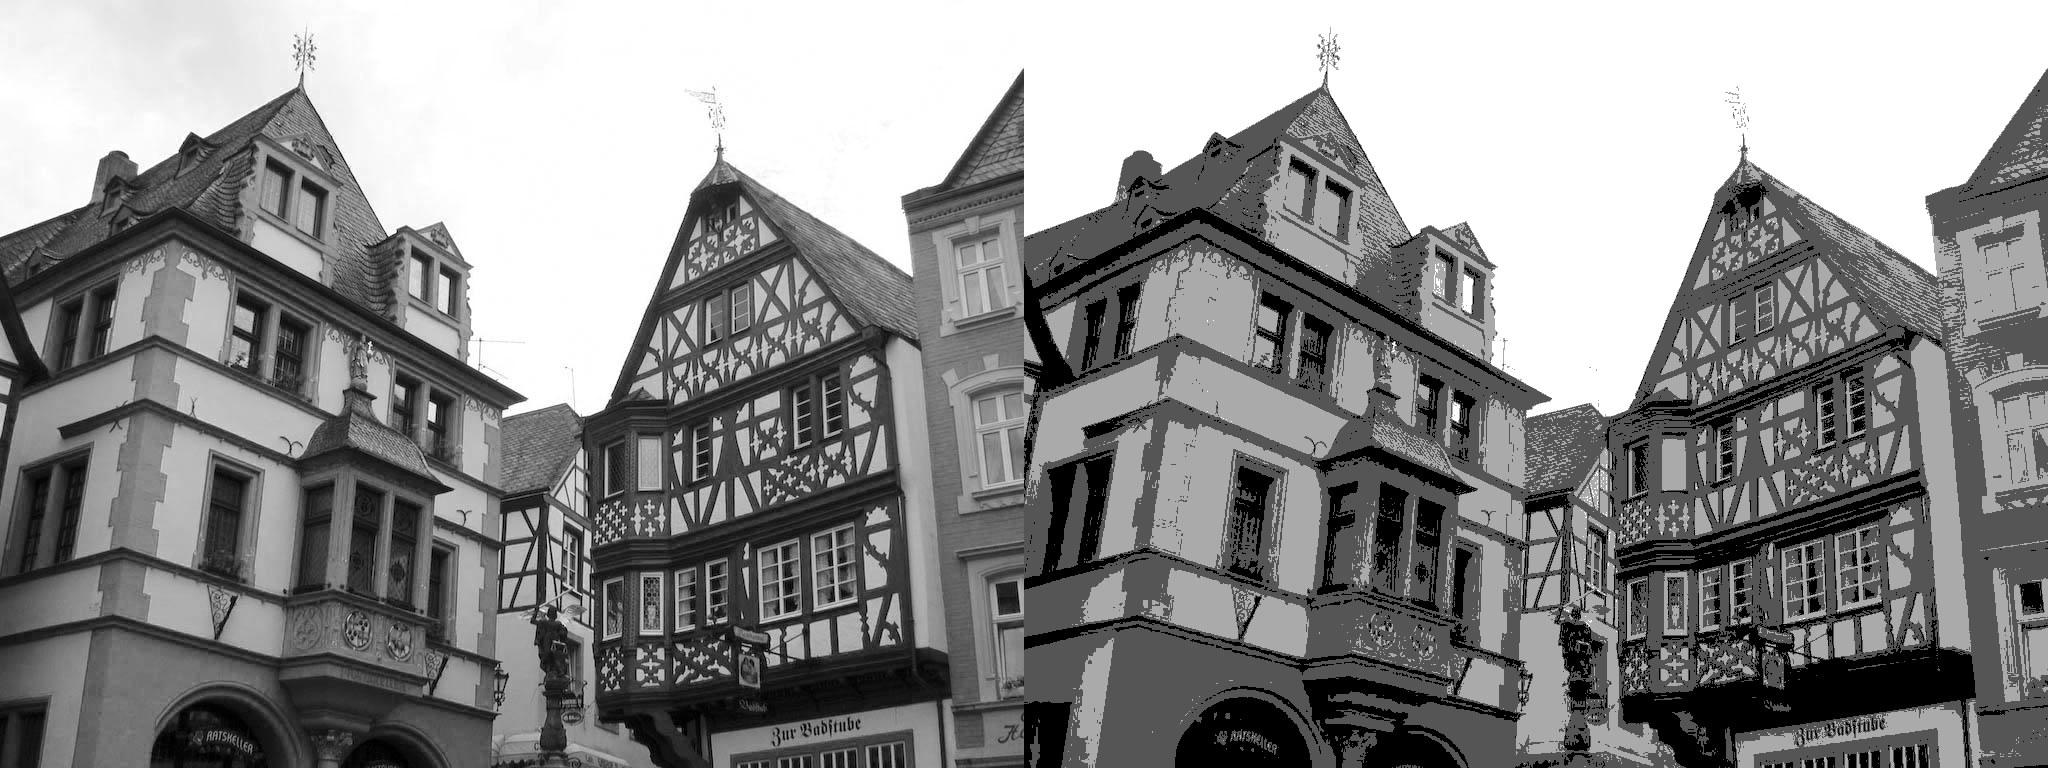

In [ ]:
print('Image Depth Simulation pada citra')
print('--------------------------------')

try: 
  depth = int(input('Masukkan nilai Depth : '))
except ValueError:
  print('error, not a number')

d_img = cv.imread('/content/drive/MyDrive/DATA/old_house.jpg')
level = 255/(2** depth - 1)

for i in range (depth):
  d_img2 = np.array(np.round((d_img/level))*level, dtype='uint8')

final_frame2 = cv.hconcat((d_img, d_img2))
cv2_imshow(final_frame2)

**3. Averange Denoising**

Jumlah Citra di Averange:  5
Nilai PSNR (dB) :  24.482294015360516


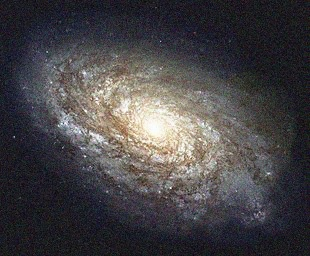


Jumlah Citra di Averange:  30
Nilai PSNR (dB) :  21.111952195901903


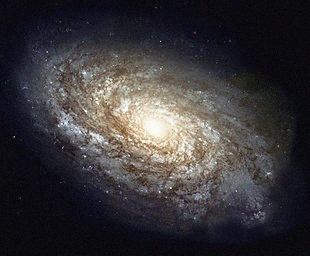


Jumlah Citra di Averange:  60
Nilai PSNR (dB) :  20.66368580966397


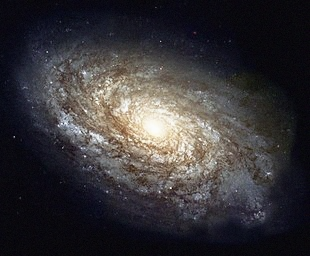


Jumlah Citra di Averange:  80
Nilai PSNR (dB) :  20.47769838677913


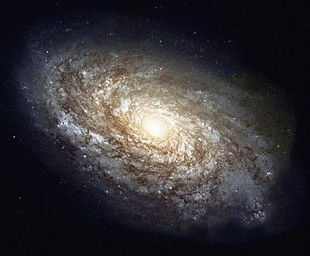


Jumlah Citra di Averange:  100
Nilai PSNR (dB) :  20.170503844148698


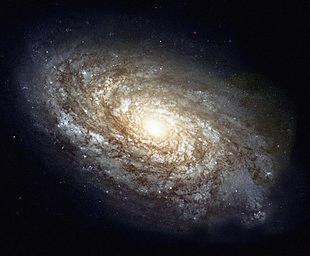

In [ ]:
import glob
import math

cv_img = glob.glob('/content/drive/MyDrive/DATA/noises/*.jpg')
cv_img.sort()

def number(n):
  temp = cv.imread(cv_img[0])
  sum_arr = np.zeros(temp.shape)
  for picture in cv_img[0:n-1]:
    img = cv.imread(picture)
    sum_arr = sum_arr + img
  denoised = sum_arr/ n
  output = cv.normalize(denoised, None, 0, 255, cv.NORM_MINMAX)
  print('Jumlah Citra di Averange: ', n)
  print('Nilai PSNR (dB) : ',PSNR(temp, output))
  cv2_imshow(output)
  print('')

def PSNR(image1, image2):
  mse = np.mean((image1 - image2)**2)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel/math.sqrt(mse))
  return psnr

number(5)
number(30)
number(60)
number(80)
number(100)

**4. Image Masking**

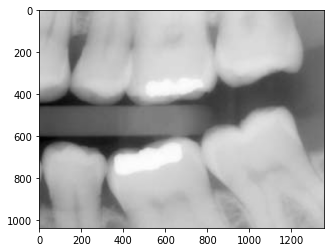

In [ ]:
import matplotlib.pyplot as plt

teeth_img = plt.imread('/content/drive/MyDrive/DATA/teeth.jpg')
plt.imshow(teeth_img)

Bitwise AND: 


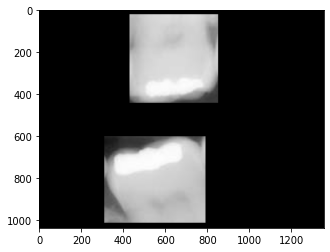

In [ ]:
teeth_img2 = teeth_img
mask = np.zeros(teeth_img2.shape[:2], dtype="uint8")
cv.rectangle(mask, (430, 20), (850, 440), 255, -1)
cv.rectangle(mask, (310, 600), (790, 1010), 255, -1)
masked_and = cv.bitwise_and(teeth_img2, teeth_img2, mask=mask)

print('Bitwise AND: ')
plt.imshow(masked_and)

**5. Percobaan dengan operator lain**

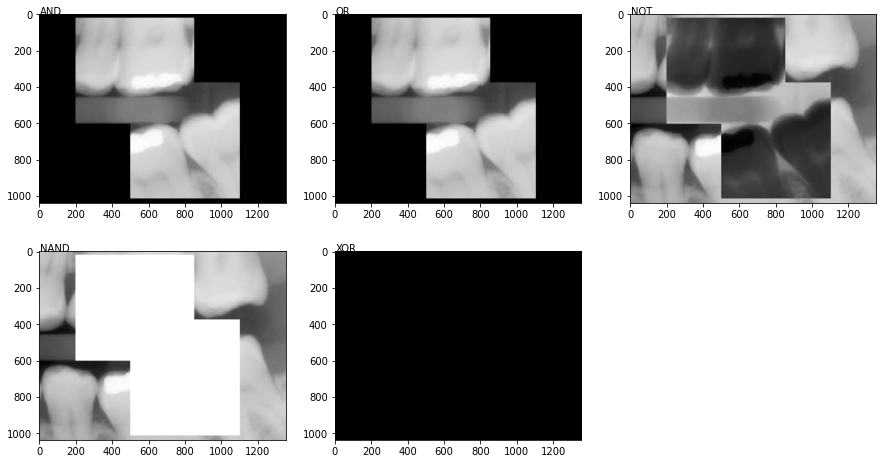

In [ ]:
teeth_img3 = plt.imread('/content/drive/MyDrive/DATA/teeth.jpg')
mask2 = np.zeros(teeth_img3.shape[:2], dtype="uint8")
cv.rectangle(mask2, (200, 20), (850, 600), 255, -1)
cv.rectangle(mask2, (500, 375), (1100, 1010), 255, -1)
masked_and2 = cv.bitwise_and(teeth_img3, teeth_img3, mask=mask2)

teeth_img4 = teeth_img
masked_or = cv.bitwise_or(teeth_img4, teeth_img4, mask=mask2)

teeth_img5 = teeth_img
masked_not = cv.bitwise_not(teeth_img4, teeth_img4, mask=mask2)

masked_nand = masked_and2 + masked_not

teeth_img6 = teeth_img
masked_xor = cv.bitwise_xor(teeth_img6, teeth_img6, mask=mask2)

fig2 = plt.figure(figsize=(15, 8))
fig2.add_subplot(2, 3, 1)
plt.text(3, 3, "AND", bbox=dict(fill=False, edgecolor='blue',linewidth=0))
plt.imshow(masked_and2)
fig2.add_subplot(2, 3, 2)
plt.text(3, 3, "OR", bbox=dict(fill=False, edgecolor='blue',linewidth=0))
plt.imshow(masked_or)
fig2.add_subplot(2, 3, 3)
plt.text(3, 3, "NOT", bbox=dict(fill=False, edgecolor='blue',linewidth=0))
plt.imshow(masked_not)
fig2.add_subplot(2, 3, 4)
plt.text(3, 3, "NAND", bbox=dict(fill=False, edgecolor='blue',linewidth=0))
plt.imshow(masked_nand)
fig2.add_subplot(2, 3, 5)
plt.text(3, 3, "XOR", bbox=dict(fill=False, edgecolor='blue',linewidth=0))
plt.imshow(masked_xor)

**SUMBER BAHAN AJAR**
1. https://pyimagesearch.com/2015/10/05/opencv-gammacorrection/#:~:text=There%20are%20two%20(easy)%20ways,range%20%5B0%2C%20255%5D.
2. https://stackoverflow.com/questions/23749968/why-datatype-has-to-be-uint8-in-opencvpythonwrapper#:~:text=uint8%20is%20an%20unsigned%208,representing%20red%2C%20green%20and%20blue.
3. https://www.geeksforgeeks.org/numpy-round_-python/#:~:text=The%20numpy.,the%20given%20number%20of%20decimals.
4. https://docs.python.org/3/library/glob.html
5. https://www.pythonpool.com/cv2-normalize/
6. https://code.adonline.id.au/peak-signal-to-noise-ratio-python/
7. https://pyimagesearch.com/2021/01/19/image-masking-with-opencv/
8. https://pyimagesearch.com/2021/01/19/opencv-bitwise-and-or-xor-and-not/
9. https://stackoverflow.com/questions/53740340/how-to-add-text-to-an-image-segment


**LAPORAN**

Setiap penjelasan baris kode saya sertakan dalam laporan.

https://drive.google.com/file/d/1tMpl0jW0YRanYjmK2oqc1PB5e73kQZCH/view?usp=sharing